In [14]:
import os
import struct
from scipy import signal as sig
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Open devices for DMA operation
xdma_axis_rd_data = os.open('/dev/xdma0_c2h_0',os.O_RDONLY)
xdma_axis_wr_data = os.open('/dev/xdma0_h2c_0',os.O_WRONLY)

In [12]:
# writing a sine signal on DMA channel
nSamples = 256
angle = np.linspace(0,2*np.pi,nSamples, endpoint=False)
sig = np.sin(2*angle)*100
sig_int = sig.astype(int)+100

# Write DMA data channel
data = struct.pack('<256Q', *sig_int)
os.pwrite(xdma_axis_wr_data,data,0)

2048

In [ ]:
# Read DMA data channel
data_rd = os.pread(xdma_axis_rd_data,2048,0)
data_unpack = struct.unpack('<256Q',data_rd)
plt.plot(data_unpack)
plt.grid()

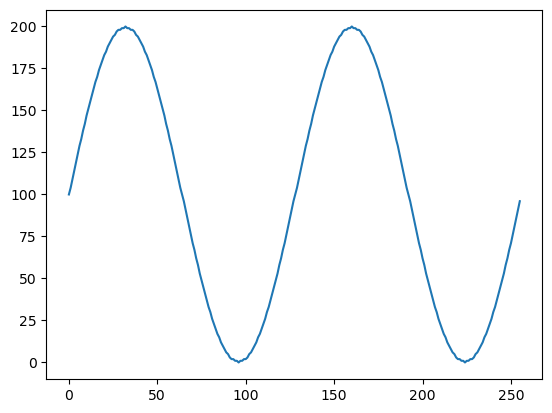

In [18]:
# Open User channel for DMA operation
xdma_user_wr = os.open('/dev/xdma0_user',os.O_WRONLY)

# Write DMA User channel
leds = 10

data = struct.pack('<Q',(15-leds)) # leds status are negated
os.pwrite(xdma_user_wr,data,0)

4